**Point process and resolution of temporal data**

Redwan Mekrami



In [1]:
import random
from math import log, exp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
from scipy.optimize import minimize, LinearConstraint, Bounds

## Simulation of a one-dimensional Hawkes process

Recall the form of the intensity of a simple Hawkes process (exponential kernel):
$$ \lambda(t) = \lambda(0) + \sum_{t_i < t} \alpha e^{-\beta(t-t_i)}$$
The algorithm of Ogata (1981) is an algorithm which generates the times of occurrence following a Hawkes process on a time interval $[0,T]$.
under the condition of providing the parameters $\lambda_0$, $\alpha$, and $\beta$
The general principle of the algorithm is the following:
- Initialization: the algorithm generates the first occurrence time s,
of exponential law $\lambda_0$ (initial intensity), it retains it only if this time
is lower than the limit time T.
- the algorithm considers the intensity at the time of the last peak $(\lambda_* ← \lambda(t_{n-1}) + \alpha)$ and generates the waiting time before the next occurrence, of exponential law of parameter $\lambda_*$. The next potential time of occurrence is the last time of occurrence to which we add this duration (always under the constraint of a time lower than T, if the time is higher, we generate a new random variable of exponential law until obtaining a time lower than T). The algorithm then performs a rejection test, if the condition is verified, we "accept" the new time with a probability $$ of occurrence and we start the loop again. If the condition is not verified, we do not record the time of occurrence, but $\lambda_*$ takes the value of the intensity in this time, and we return to the step where the
returns to the step where we generate a new time of occurrence.


In [3]:
# définition des paramètres
lambda_0 = 5
alpha = 0.6
beta = 1
T = 100

In [4]:
# class simulation
class SimulationHawkes:
    def __init__(self, lambda_0, alpha, beta, T):
        self.lambda_0 = lambda_0
        self.alpha = alpha
        self.beta = beta
        self.T = T
        self.list_t = list()
    
    def lambda_func(self, t):
        if t == 0:
            return self.lambda_0
        elif len(self.list_t) == 0:  # if we do not have times yet
            return self.lambda_0
        else:
            return self.lambda_0+ np.sum(self.alpha*np.exp(-self.beta*(t-np.array(self.list_t)[np.array(self.list_t) <= t]))) 
    
    def max_lambda_func(self, t):
        if len(np.array(self.list_t)[np.array(self.list_t) < t]) != 0:
            last_t = np.array(self.list_t)[np.array(self.list_t) < t][-1]
        else:
            last_t = 0
        return self.lambda_func(last_t)
            
        
    def launch_simulation(self):
        self.list_t = list()
        lambda_ = self.lambda_0 # initialisation de l'intensité
        n = 0 # Premier tirage
        init = False
        # Cette étape d’initialisation crée le premier temps de survenance  qui est ici une réalisation d’une loi exponentielle de paramètre lambda_0
        # On génère une loi exponentielle (à partir d'une loi uniforme)
        U = random.random()
        s = -log(U)/lambda_
        if s <= T:
            self.list_t.append(s)
        # La routine générale de l’algorithme génère les autres temps de survenances à l’aide d’un test de rejet.
        if len(self.list_t) != 0: # si le premier point est inférieur à T
            classic_update = True
            while True:  # elle s'arrêtera avec le break
                # à chaque étape dans la boucle, l’algorithme modifie le paramètre lamnda_ de la loi exponentielle en rajoutant un saut alpha à la valeur de l’intensité précédente.
                if classic_update:
                    n += 1
                    lambda_ = self.lambda_func(self.list_t[n-1]) + self.alpha
                else:
                    lambda_ = self.lambda_func(self.list_t[n-1])
                # On génère une loi exponentielle d'itensité lambda_
                U = random.random()
                s += -log(U)/lambda_
                if s > T: # If on a dépassé le temps final
                    break # on arrête la boucle while et on return list_t
                else:
                    D = random.random()
                    if self.lambda_func(s)/lambda_ >= D:
                        self.list_t.append(s)
                        classic_update = True
                    else:
                        classic_update = False

                    
    def plot(self, n_points):
        self.launch_simulation()
        f = plt.figure(figsize=(12, 12))
        
        # real intensity
        X = np.linspace(0, T, num=n_points)
        y1 = [self.lambda_func(t) for t in X]
        plt.plot(X, y1, color='red', label='intensity λ')
        
        # max intensity
        y2 = [self.max_lambda_func(t) for t in X]
        plt.plot(X, y2, '--g', label = 'max intensity λ')
            
        # arrival
        plt.plot(self.list_t, [0 for _ in range(len(self.list_t))], 'xb', label = 'arrivées Hawkes')
        plt.legend()
        plt.title("Hawkes process simulation with λ0 = {}, alpha = {}, beta = {}".format(self.lambda_0,self.alpha,self.beta))
        plt.show()       

In [5]:
simu = SimulationHawkes(lambda_0=lambda_0, alpha=alpha, beta=beta, T=T)

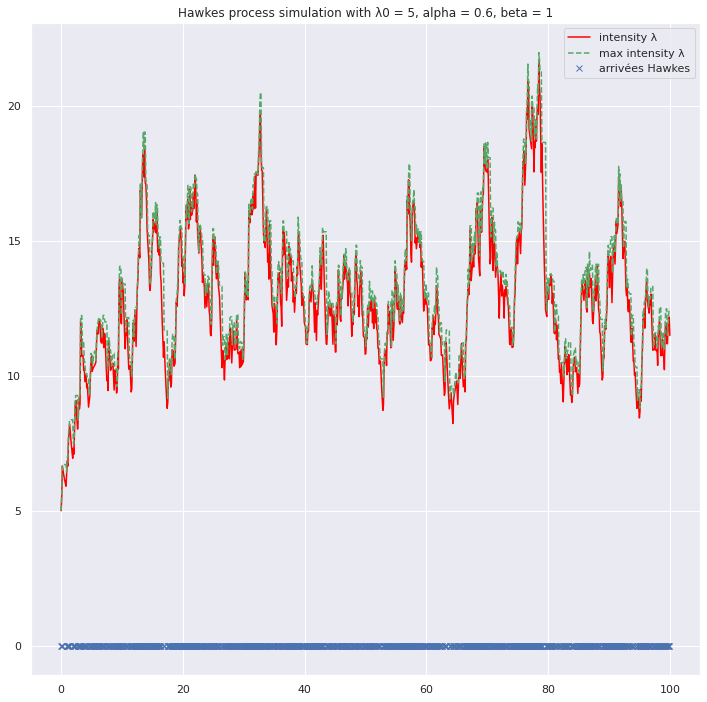

In [6]:
simu.plot(1000)

## Influence de $\lambda_0$

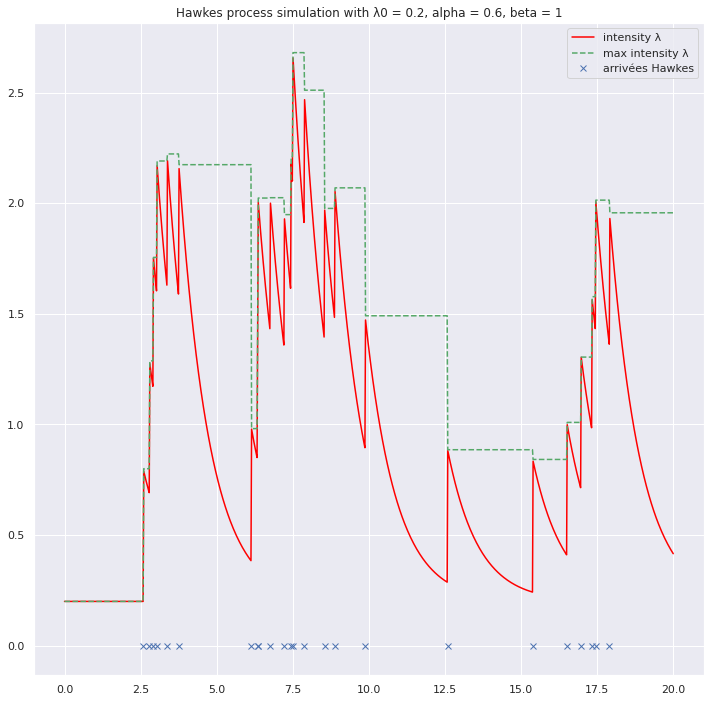

In [7]:
lambda_0 = 0.2
alpha = 0.6
beta = 1
T = 20
simu = SimulationHawkes(lambda_0=lambda_0, alpha=alpha, beta=beta, T=T)
simu.plot(1000)

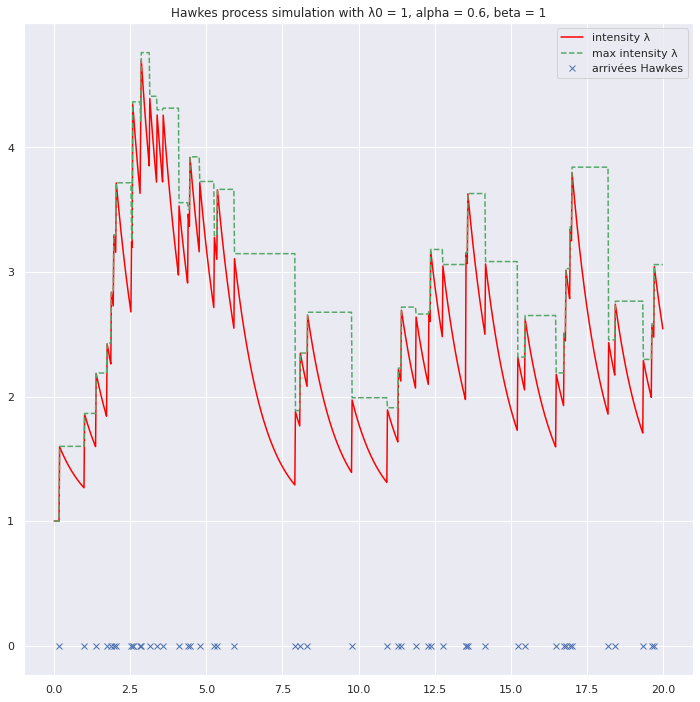

In [8]:
lambda_0 = 1
alpha = 0.6
beta = 1
T = 20
simu = SimulationHawkes(lambda_0=lambda_0, alpha=alpha, beta=beta, T=T)
simu.plot(1000)

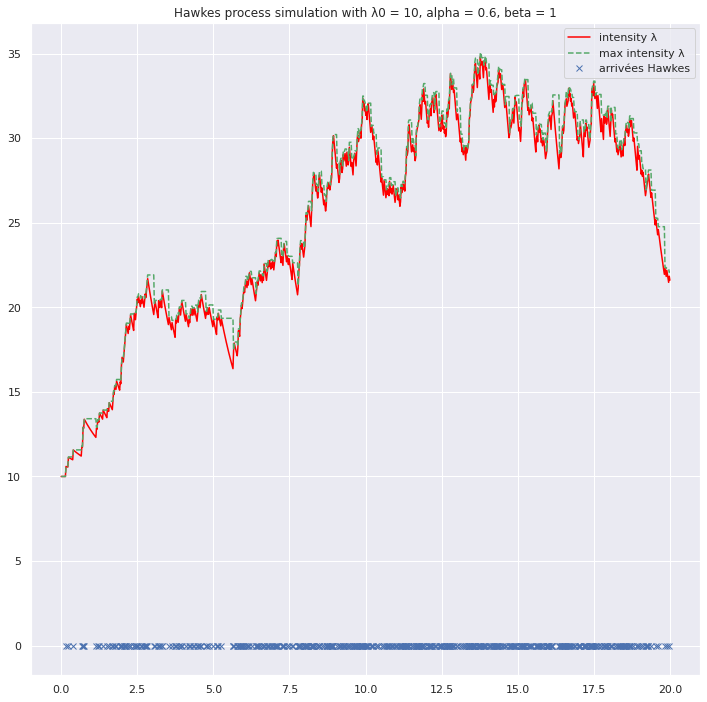

In [9]:
lambda_0 = 10
alpha = 0.6
beta = 1
T = 20
simu = SimulationHawkes(lambda_0=lambda_0, alpha=alpha, beta=beta, T=T)
simu.plot(1000)

## Influence de $\alpha$

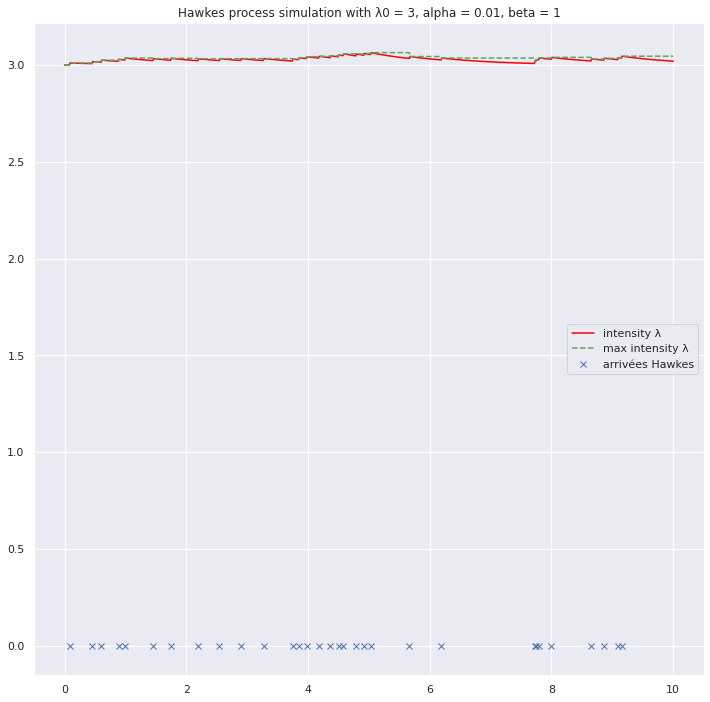

In [10]:
lambda_0 = 3
alpha = 0.01
beta = 1
T = 10
simu = SimulationHawkes(lambda_0=lambda_0, alpha=alpha, beta=beta, T=T)
simu.plot(1000)

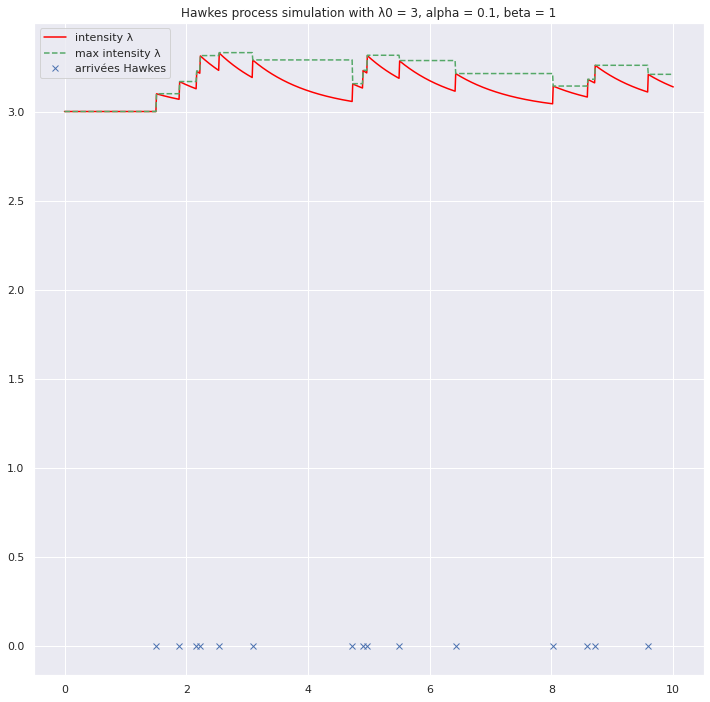

In [11]:
lambda_0 = 3
alpha = 0.1
beta = 1
T = 10
simu = SimulationHawkes(lambda_0=lambda_0, alpha=alpha, beta=beta, T=T)
simu.plot(1000)

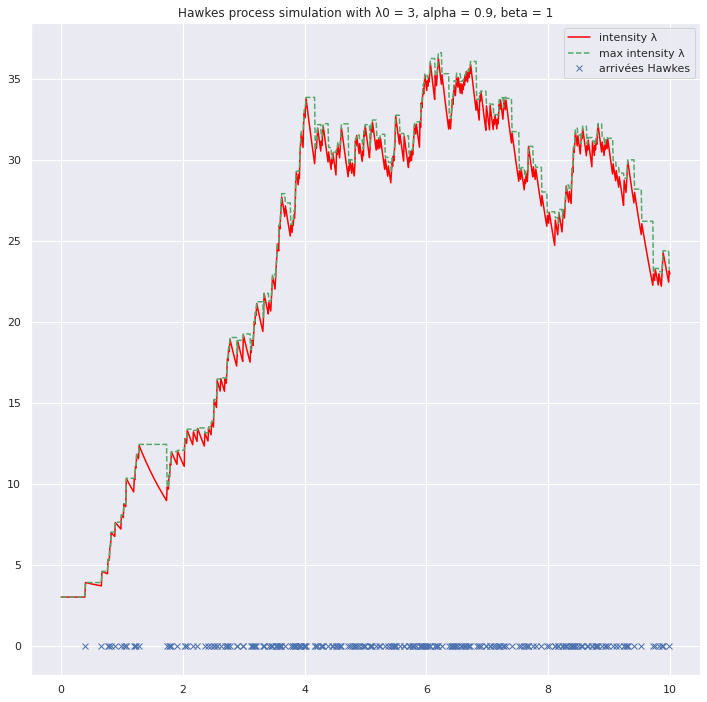

In [12]:
lambda_0 = 3
alpha = 0.9
beta = 1
T = 10
simu = SimulationHawkes(lambda_0=lambda_0, alpha=alpha, beta=beta, T=T)
simu.plot(1000)

## Influence de $\beta$

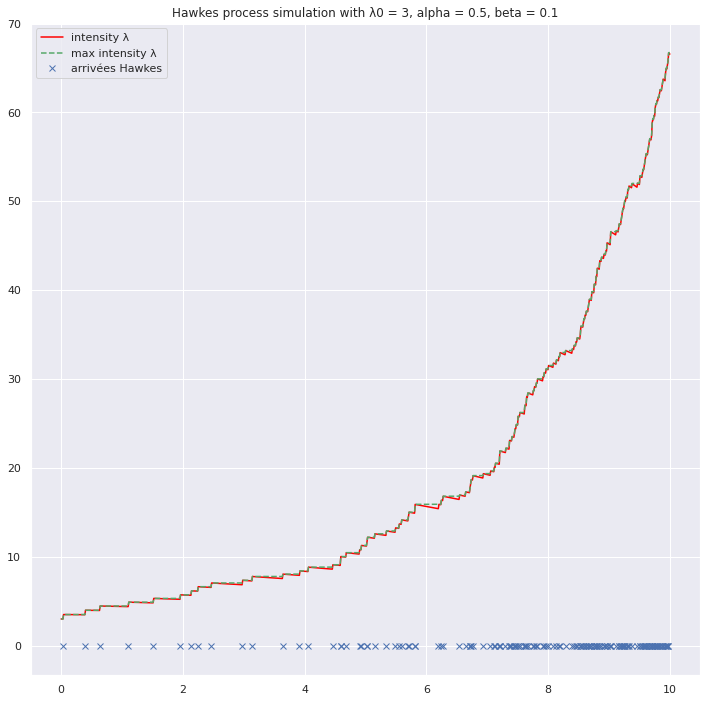

In [13]:
lambda_0 = 3
alpha = 0.5
beta = 0.1
T = 10
simu = SimulationHawkes(lambda_0=lambda_0, alpha=alpha, beta=beta, T=T)
simu.plot(1000)

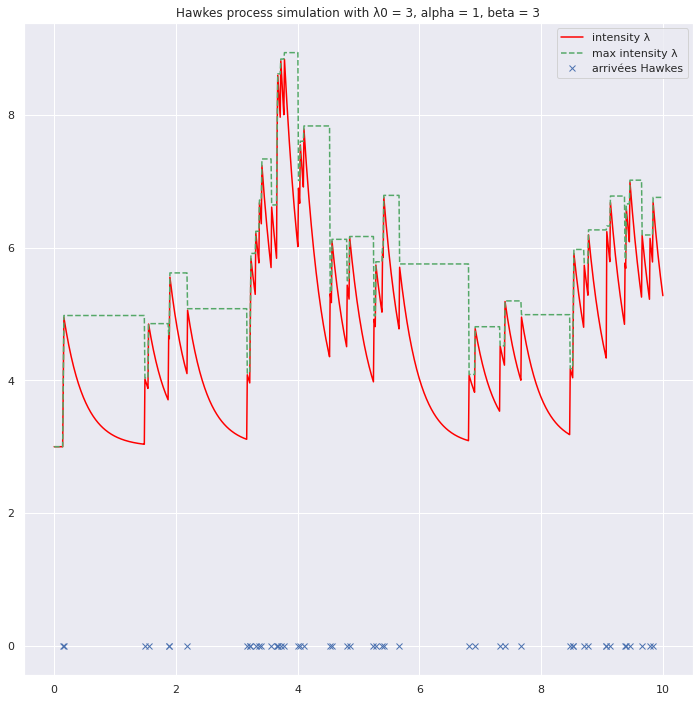

In [14]:
lambda_0 = 3
alpha = 1
beta = 3
T = 10
simu = SimulationHawkes(lambda_0=lambda_0, alpha=alpha, beta=beta, T=T)
simu.plot(1000)

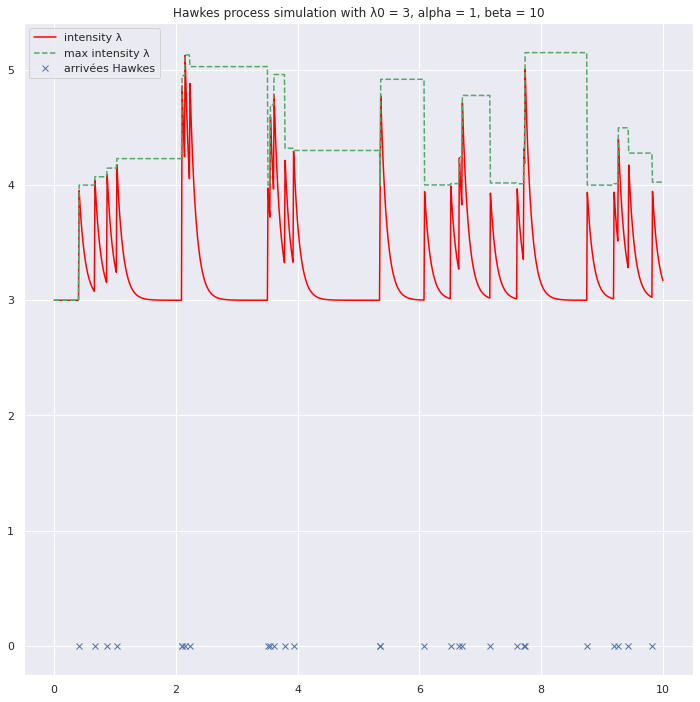

In [15]:
lambda_0 = 3
alpha = 1
beta = 10
T = 10
simu = SimulationHawkes(lambda_0=lambda_0, alpha=alpha, beta=beta, T=T)
simu.plot(1000)

## Estimation d'un processus de Hawkes

The log-likelihood of a point process $(N_t)_{t \geq 0}$ with intensity $(\lambda_t)_{t \geq 0}$ that we observe on $[0,T]$ is :

$$ \log(\mathcal{L}_T) = \displaystyle \int_{0}^{T} \log(\lambda_s) \, \mathrm{d}N_s - \int_{0}^{T} \lambda_s, \mathrm{d}s$$

We can therefore take the empirical likelihood expressed as a function of the arrival times $(t_i)_{n \geq i \geq 0}$

$$ \log(\mathcal{L}((t_i)_{i=1,...,n}, \alpha, \beta, \lambda_0)) = t_n - t_n\lambda_0 - \sum_{i=1}^n \frac{\alpha}{\beta}(1 - e^{-\beta(t_n-t_i)}) + \sum_{i=1}^n \log(\lambda_0 + \sum_{t_k < t_i}\alpha e^{-\beta(t_i-t_k)})$$
$$ \log(\mathcal{L}((t_i)_{i=1,...,n}, \alpha, \beta, \lambda_0)) =  - T\lambda_0 - \sum_{i=1}^n \frac{\alpha}{\beta}(1 - e^{-\beta(T-t_i)}) + \sum_{i=1}^n \log(\lambda_0 + \sum_{t_k < t_i}\alpha e^{-\beta(t_i-t_k)})$$

We will maximize this function on $\alpha$, $\beta$ and $\lambda_0$

In [16]:
def log_likelihood(list_t,T):
    n = len(list_t)
    def f(params):
        alpha, beta, lambda_0 = params[0], params[1], params[2]
        if (alpha <= 0 or beta <= 0 or lambda_0 <= 0):
            return np.inf
        result = -T*lambda_0
        R = 0
        for i in range(n):
            result -= (alpha/beta) * (1 - exp(-beta*(T-list_t[i])))
            result_bis = 0
            if i>= 1:
              R = exp(-beta*(list_t[i]-list_t[i-1]))*(1+R)
            result += log(lambda_0 + R*alpha)
        return - result # return - car on va utiliser un minimiseur
    return f

In [22]:
list_alpha = list()
list_beta = list()
list_lambda_0 = list()

n_test = 10
alpha = 0.6
beta = 1
lambda_0 = 5
T = 2000

# les valeurs doivent êtres positives et alpha <= beta
constr = LinearConstraint([[1,-1,0]], lb=-np.inf, ub=0)
bounds = Bounds([0,0,0], [np.inf,np.inf,np.inf])

for _ in range(n_test):
    print(_)
    if (_+1) % 100 == 0:
      print(_+1)
    simu = SimulationHawkes(lambda_0=lambda_0, alpha=alpha, beta=beta, T=T)
    simu.launch_simulation()
    list_t = simu.list_t
    f = log_likelihood(list_t,T)
    x = minimize(f, x0 = (0.5, 0.7, 3),constraints=constr, bounds=bounds).x
    list_alpha.append(x[0])
    list_beta.append(x[1])
    list_lambda_0.append(x[2]) 

0
1
2
3
4
5
6
7
8
9


In [23]:
alpha_estimator = np.mean(list_alpha)
beta_estimator = np.mean(list_beta)
lambda_0_estimator = np.mean(list_lambda_0)
print("Pour T={} et n_test={}: \n L'estimation donne alpha = {:.3f}, beta = {:.3f}, lambda_0 = {:.3f}. \n Les valeurs théoriques étant alpha = {}, beta = {}, lambda_0 = {}".format(T, n_test, alpha_estimator, beta_estimator, lambda_0_estimator,alpha,beta,lambda_0))

Pour T=2000 et n_test=10: 
 L'estimation donne alpha = 0.586, beta = 0.970, lambda_0 = 4.949. 
 Les valeurs théoriques étant alpha = 0.6, beta = 1, lambda_0 = 5


In order to verify the asymptotic behavior of the estimators $\hat {\alpha}_n$, $\hat {\beta}_n$ and $(\hat{\lambda }_{0})_n$, we study the distribution of each estimator for a large enough n. To do so, we plot the corresponding histograms and check if they follow a Gaussian distribution.

For the estimates, we take $n=1000$.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution de l'estimateur d'alpha pour n=10")

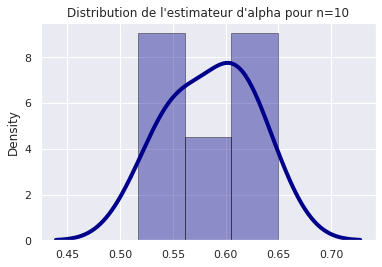

In [24]:
# L'estimateur d'alpha
sns.distplot(list_alpha, hist=True, kde=True,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set_title("Distribution de l'estimateur d'alpha pour n={}".format(n_test))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution de l'estimateur de beta pour n=10")

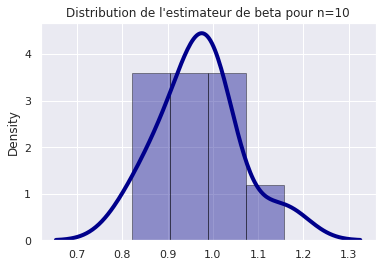

In [25]:
# L'estimateur de beta
sns.distplot(list_beta, hist=True, kde=True,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set_title("Distribution de l'estimateur de beta pour n={}".format(n_test))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution de l'estimateur de lambda_0 pour n=10")

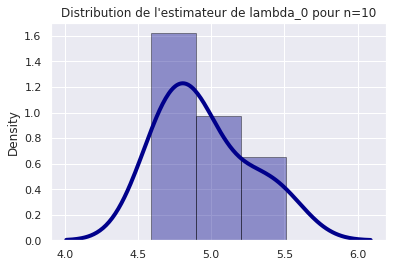

In [26]:
# L'estimateur de lambda_0
sns.distplot(list_lambda_0, hist=True, kde=True,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set_title("Distribution de l'estimateur de lambda_0 pour n={}".format(n_test))

The distribution of the three estimators is very close to that of a Gaussian distribution with the parameter to be estimated as mean.

Once it works, we will truncate_t to check if the estimator still works (we will round the t of the list), when we pass him the times with precision machine ok, then we will make experiments with a less good precision

If we have results that are not too bad, if we shock them a little, can we re-estimate the alpha, beta lambda?

# Multi-dimentional Hawkes process 

A M-dimentional Hawkes process is a point process $N_t=(N_t^1,..,N_t^M)$ with intensities $(\lambda_t^m)_{t\geq 0}$, $m=1,..,M$ such that: 

$$\lambda^m(t)=\lambda_0^m(t)+\sum_{n=1}^M \int_0^{t}g_{mn}(t-s)dN_s^n$$
where $\lambda_0:[0,\infty) \rightarrow \mathbb{R}^+$ and $g_{mn}:[0,\infty)\rightarrow \mathbb{R}^+$, $m,n=1,..M$ are deterministic functions.

Using vector notations: 

$$\underline{\lambda}(t) = \underline{\lambda_0}(t)+\int_0^t \underline{G}(t-s).d\underline{N}_s.$$

For exponential kernels: $\underline{G}(t)=(\alpha^{mn}e^{-\beta^{mn} t })_{m,n=1,..,M}$, and $\lambda^m(t)= \lambda_0^m(t)+\sum_{n=1}^M \sum_{t_n<t}\alpha^{mn}e^{-\beta^{mn} (t-t_n)}. $

The M-dimentional Hawkes process is said to be *stable if the spectral radius of the matrix $\Gamma = \int_0^{\infty}\underline{G}(u)du$ is strictly smaller than $1$.* 

In the exponential case, $\Gamma = (\frac{\alpha^{mn}}{\beta^{mn}})_{m,n= 1,..,M}$.




# Simulation of a multi-dimentional Hawkes process


For simplifications, we consider $\underline{\lambda_0}(t) = \underline{\lambda_0}$.

We define $I^K(t)=\sum_{n=1}^K \lambda^n(t)$ the sum of intensities of the first $K$ components of the multivariate process. $I^M(t)$ is thus the sum of all the intensities of the process (the total intensity). The algorithm is then: 


1.   Initialization: $i\leftarrow 1$, $i^1\leftarrow 1$, .. , $i^M\leftarrow 1$ and $I*\leftarrow I^M(0)=\sum_{n=1}^M\lambda_0^n(0)=\sum_{n=1}^M\lambda_0^n$.

2.   First event:  Generate $s\sim \mathcal{P}(I^*)$ (we can use the python function numpy.random.exponential or generate $U \sim \mathcal{U}([0,1])$ and set $s\leftarrow -\frac{1}{I^\ast}\log (U)$).

    2.1. If $s>T$, then go to last step.

    2.2. Else: Attribution test: Generate $D \sim \mathcal{U}([0,1])$ and set $t_1^{n_0} \leftarrow s$ where $n_0$ is such that $\frac{I^{n_0-1}(0)}{I^\ast} < D \leq \frac{I^{n_0}(0)}{I^\ast}$, and $t_1 \leftarrow t_1^{n_0}$.

3. Main loop: Set $i^{n_0}\leftarrow i^{n_0}+1$ and $i\leftarrow i+1$

    3.1. Update maximum intensity: Set $I^* \leftarrow I^M(t_{i-1})+ \sum_{n=1}^M\alpha^{nn_0}$.

    3.2. New event: Generate  $s\sim \mathcal{P}(I^*)$. If $s>T$ then go to the last step.

    3.3. Attribution-rejection test: Generate $D \sim  \mathcal{U}([0,1])$: 

      - If $D \leq \frac{I^M(s)}{I^*}$, set $t_{i^{n_0}}^{n_0} \leftarrow s$ where $n_0$ is such that  $\frac{I^{n_0-1}(s)}{I^\ast} < D \leq \frac{I^{n_0}(s)}{I^\ast}$ and $t_i\leftarrow t_{i^{n_0}}^{n_0} $ and go through the main loop again,
      - Else update $I^*\leftarrow I^M(s)$ and try a new date at step 3.2 of the main loop.


4. Output: Retrieve the simulated process $(\{t_i^n\}_i)_{n=1,..,M}$ on $[0,T]$.



<!--**Implementation:**

We adopt the same notations as in this [preprint](https://arxiv.org/pdf/2005.06542.pdf) and we write the exponential kernel as: $G(t)= \alpha^{mn}\omega^{mn}e^{\omega^{mn}t}$ for $m,n=1,..,M$. For simplifications, we consider the case where $\omega^{mn}=\omega$. Also, we note that, given the rates at the last event $t_k$, we can calculate $\lambda(t)$ for $t>t_k$ by: 
$$\lambda^n(t)= \lambda_0 +e^{-\omega(t-t_k)}(\alpha_{nn_k}\omega + (\lambda^n(t_k)-\lambda_0)).$$

Also, the step 3.3 of the algorithm amounts to a weighted random sample over the integers $1,..,M+1$ where the probabilities are the normalized rates, and selecting $M+1$ is equivalent to the “rejection” condition. This allows us to use optimized package software for weighted random samples. -->

I used [this code](https://github.com/stmorse/hawkes) which  the implementation of this [preprint](https://arxiv.org/pdf/2005.06542.pdf), and modified it.

# Parameters estimation for the multivariate Hawkes process 

**Log-likelihood of a multivariate Hawkes process**:

The log-likelihood of a multidimensional Hawkes process can be computed
as the sum of the likelihood of each coordinate, i.e. is written:
$$\log \mathcal{L}(\{t_i\}_{i=1,...,N}) = \sum_{m=1}^M \log \mathcal{L} ^m(\{t_i\}) $$ 

where each term is defined by:
$$\log \mathcal{L} ^m(\{t_i\}) = \int _0^T (1 - \lambda^m(s))ds + \int_0^T \log\lambda^m(s)dN^m(s).$$

The final expression of the log-likelihood of a multidimentional Hawkes process can be written as: 

$$\log \mathcal{L} ^m(\{t_i\}) = -\lambda_0^mT - \sum_{i=1}^N \sum_{n=1}^M \frac{\alpha^{mn}}{\beta^{mn}}(1-e^{-\beta^{mn}(T-t_i)})+ \sum_{t_i^m}\log\left(\lambda_0^m+\sum_{n=1}^M\alpha^{mn}R^{mn}(i)\right)$$

where $R^{mn}(0)=0$ and 
$R^{mn}(i)= 
\left\{
  \begin{array}{ll}
      e^{-\beta(t^m_i-t^m_{i-1})}(1+R^{mn}(i-1)) & \mbox{if } m=n \\
      e^{-\beta(t^m_i-t^m_{i-1})}R^{mn}(i-1) + \sum_{t_{i-1}^m \leq t_k^n< t_i^m}e^{-\beta^{mn}(t_i^m-t_k^n)}  & \mbox{otherwise}
  \end{array}
\right.$.



<!-- The best method for estimation the parameters of our hawkes process is an Expectation-Maximization approach.
## Problems with ML approach ##
Considering a sequence $(τ_i)_{i=1}^N$ where each $τ_i = (t_i, u_i)$ corresponding to the time $t_i$ of the event and the stream $u_i$ where it occured. The likelihood of a given sequence $τ$ is given by:

$$\mathcal{L}(A, \mu)=\sum_{i=1}^{N} \log \left(\mu_{u_{i}}+\sum_{t_{j}<t} a_{u_i u_j} g\left(t_{i}-t_{j}\right)\right)-T\sum_{u=1}^{U}\mu_{u}-\sum_{u=1}{U}\sum_{j=1}^{N}a_{u u_{j}}G\left(T-t_{j}\right)$$

A huge problem facing us here is not the only the big number of parameters to estimate here, but also the induced over-fitting of such a number.
To solve this, we need to introduce a low-rank regularization of our matrix A:

$$
\min _{A, \mu}-\mathcal{L}(A, \mu)+\mathcal{f}(A, \mu)
$$
Where f if a regularization function on A and $\mu$ that enforces conditions of sparsity, low-rank or ... depending on our needs and the chosen approach.

In practice the function is extremely “flat” around the optimum, causing problems with slow convergence in first order methods and second-order methods.

## EM approach ##

In "J. R. Zipkin, F. Schoenberg, K. Coronges, and A. Bertozzi. Point-process models of social network interactions: parameter estimation and missing data recovery", the EM approach is the main method for parameter estimation for Hawkes processes.

The principle of the method is introducing latent variables to maximize the "complete data likelihood". First let's define the complete data posterior for our multivariate Hawkes process :

$p(\Theta \mid \tau, Q) \propto p(\tau, Q \mid \Theta) p(\Theta ; V)$
for a sequence $\tau$ and a branching matrix $Q$

Then let $$
\mathcal{L}(\tau, Q ; \Theta, V)=\log p(\tau, Q ; \Theta)+\log p(\Theta ; V)
$$
be the complete data log likelihood under the parameters $\Theta$ and hyperparameters $V$.

It now remains to express the complete data likelihood, that is, what is the likelihood of a particular sequence and branching matrix given the parameters $\Theta .$ Following what was done by Zipkin, we can express the complete data log-likelihood as
$$
\begin{aligned}
\log p(\tau, Q \mid \Theta)=& \sum_{i=1}^{N} p_{i i} \log \frac{\mu_{u_{i}}}{p_{i i}}+\sum_{i=1}^{N} \sum_{j=1}^{i-1} p_{i j} \log \frac{\alpha_{u_{i} u_{j}} g\left(t_{i}-t_{j}\right)}{p_{i j}} \\
&-T \sum_{u=1}^{U} \mu_{u}-\sum_{u=1} \sum_{j=1}^{N} \alpha_{u u_{j}} G\left(T-t_{j}\right)
\end{aligned}
$$
And the E-step and M-step in the algorithm can be effeciently calculated and expressed from this point on.-->

In [27]:
import numpy as np
import time as T
from datetime import datetime as dt
from tqdm import tqdm

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.utils.extmath import cartesian
from scipy.optimize import NonlinearConstraint, minimize, Bounds, BFGS, differential_evolution
import matplotlib.pyplot as plt

## 1. Simulation

In [28]:
class MultiDimHawkes: 

    def __init__(self, lambda_0, alpha, beta):
        self.lambda_0 = np.array(lambda_0)
        self.alpha = np.array(alpha)
        self.beta = np.array(beta)
        self.data = []
        self.check_stability()
        self.dim = self.lambda_0.shape[0]
        
        self.data_dict = dict() 
        for m in range(self.dim): 
            self.data_dict[m] = []

    def check_stability(self):
        ''' check stability condition of process '''
        w, v = np.linalg.eig(self.alpha/self.beta)
        max_eigval = np.amax(np.abs(w))
        print('Max eigenvalue: %1.5f' % max_eigval)
        if max_eigval >= 1.:
            print('(WARNING) Unstable.')
    
    def lambda_func(self,t):
        ''' compute lambda(t) '''
        if (t == 0 or len(self.data) == 0):
            return self.lambda_0
        
        else :
            lambda_t = np.array(self.lambda_0)
            for m in range(self.dim):
                sum_ = 0
                for [s,n] in self.data:
                    if s<t:
                      sum_ += self.alpha[m,n]*np.exp(-self.beta[m,n]*(t-s))
                lambda_t[m] += sum_

            return lambda_t


    def generate_seq(self, horizon):
        '''Generate a sequence based on lambda_0, alpha and beta values. 
        Uses Ogata's thinning method'''
        
        # we keep every event t_i and the associated process in self.data
        self.data = []  # clear history
        lambda_ = [self.lambda_0]
        lastrates_ = [self.lambda_0]
        Istar = np.sum(self.lambda_0)
        
        ## 1. Initialization 
        # first event: s sampled from an exponontial distribution of parameter Istar 
        s = np.random.exponential(scale=1./Istar) 
        if s > horizon: 
            return self.data, self.data_dict, lastrates_, lambda_
        else: 
            # attribute test 
            # initializing the process n0 (to which we will assign the first event s)
            D = np.random.uniform()
            n0 = 0
            while D > np.sum(self.lambda_0[:n0+1])/Istar: 
                n0+= 1
            self.data.append([s, n0]) # event s is associated to process n0
            self.data_dict[n0].append(s) 
            """ # attribute (weighted random sample, since sum(lambda_0)==Istar)
            n0 = np.random.choice(np.arange(self.dim), p=(self.lambda_0 / Istar))
            self.data.append([s, n0]) # event s is associated to process n0"""

        # value of \lambda(t_k) where k is most recent event
        # starts with just the base rate
        lastrates = self.lambda_0.copy() 
        
        decIstar = False # True if the last event was rejected
        while True:
            
            tj, nj = self.data[-1][0], int(self.data[-1][1])

            ## 2. Update maximum intensity

            if decIstar:
                # if last event was rejected, decrease Istar
                Istar = np.sum(rates)
                decIstar = False
            else:
                # otherwise, we just had an event, so recalc Istar (inclusive of last event)
                Istar = np.sum(lastrates) + np.sum(self.alpha[:,nj])
            
            ## 3. Generate new event
            s += np.random.exponential(scale=1./Istar)
            
            if s < horizon:
                # calculate rates at time s 
                rates = self.lambda_func(s)
                
                lambda_.append(rates.copy())
                D = np.random.uniform()
                if D <= np.sum(rates)/Istar:
                    n0 = 0
                    while D > np.sum(rates[:n0+1])/Istar : 
                        n0 += 1
                    self.data.append([s, n0])
                    lastrates = rates.copy()
                    #print("lastrates",lastrates)
                    lastrates_.append(lastrates)
                else:
                    decIstar = True 
                # attribution/rejection test

                # handle attribution and thinning in one step as weighted random sample
                """diff = Istar - np.sum(rates)

                if diff >0:
                    try:
                        n0 = np.random.choice(np.arange(self.dim+1), 1, 
                                              p=(np.append(rates, diff)/Istar))[0]
                    except ValueError as e:
                        # by construction this should not happen
                        print(e)
                        print(np.append(rates, diff) / Istar)
                        self.data = np.array(self.data)
                        return self.data, self.data_dict, lastrates_, lambda_

                    if n0 < self.dim:
                        self.data.append([s, n0])
                        self.data_dict[n0].append(s) 
                        # update lastrates
                        lastrates = rates.copy()
                    else:
                        decIstar = True
                
                else:
                    decIstar = True
                # if past horizon, done"""
            else: 
                self.data = np.array(self.data)
                
                return self.data, self.data_dict, lastrates_, lambda_

    def get_rate(self, ct, d):
        # return rate at time ct in dimension d
        seq = np.array(self.data)
        if not np.all(ct > seq[:,0]): seq = seq[seq[:,0] < ct]
        return self.lambda_0[d] + \
            np.sum([self.alpha[d,int(j)]*np.exp(-self.beta[d,int(j)]*(ct-t)) for t,j in seq])

    
    def plot_rates(self, horizon=-1):
        
        if len(data) >0:
            if horizon < 0:
                horizon = np.amax(self.data[:,0])

            f, axarr = plt.subplots(self.dim*2,1, sharex='col', 
                                    gridspec_kw = {'height_ratios':sum([[3,1] for i in range(self.dim)],[])}, 
                                    figsize=(8,self.dim*2))
            xs = np.linspace(0, horizon, int((horizon/100.)*1000))
            for i in range(self.dim):
                row = i * 2

                # plot rate
                r = [self.get_rate(ct, i) for ct in xs]
                axarr[row].plot(xs, r, 'k-')
                axarr[row].set_ylim([-0.01, np.amax(r)+(np.amax(r)/2.)])
                axarr[row].set_ylabel('$\lambda(t)_{%d}$' % i, fontsize=14)
                r = []

                # plot events
                subseq = self.data[self.data[:,1]==i][:,0]
                axarr[row+1].plot(subseq, np.zeros(len(subseq)) - 0.5, 'bo', alpha=0.2)
                axarr[row+1].yaxis.set_visible(False)

                axarr[row+1].set_xlim([0, horizon])

            plt.tight_layout()

    def plot_events(self, horizon=-1, showDays=True, labeled=True):
        if horizon < 0:
            horizon = np.amax(self.data[:,0])

        fig = plt.figure(figsize=(10,2))
        ax = plt.gca()
        for i in range(self.dim):
            subseq = self.data[self.data[:,1]==i][:,0]
            plt.plot(subseq, np.zeros(len(subseq)) - i, 'bo', alpha=0.2)

        if showDays:
            for j in range(1,int(horizon)):
                plt.plot([j,j], [-self.dim, 1], 'k:', alpha=0.15)

        if labeled:
            ax.set_yticklabels('')
            ax.set_yticks(-np.arange(0, self.dim), minor=True)
            ax.set_yticklabels([r'$e_{%d}$' % i for i in range(self.dim)], minor=True)
        else:
            ax.yaxis.set_visible(False)

        ax.set_xlim([0,horizon])
        ax.set_ylim([-self.dim, 1])
        ax.set_xlabel('Days')
        plt.tight_layout()

        

In [29]:
alpha = [[0.1,0.2],[0.3,0.4]]
beta = [[1,1],[1,1]]
lambda_0 = [0.1,0.5]
MHP_M1 = MultiDimHawkes(lambda_0, alpha, beta)

horizon = 80
t0 = dt.now()
data, data_dict, lastrates_, lambda_ = MHP_M1.generate_seq(horizon)


print("it took {}".format(dt.now()-t0))

Max eigenvalue: 0.53723
it took 0:00:00.055743


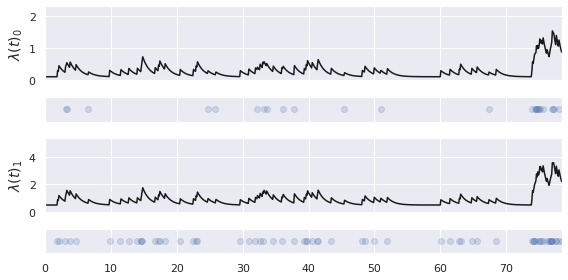

In [30]:
MHP_M1.plot_rates()

## 2. Estimation 

In [31]:
def compute_R(last_R_mn,m,n,i,beta,data_dict):
    """ Compute R_mn(i) """
    if i == 0 :
      return 0 
    else : # i >0
        if m==n:
            R = np.exp(-beta[m,n]*(data_dict[m][i]-data_dict[m][i-1]))*(1+last_R_mn)
        else: 
            R = np.exp(-beta[m,n]*(data_dict[m][i]-data_dict[m][i-1]))*last_R_mn
            t_n_list = np.array(data_dict[n])
            t_n_list = t_n_list[t_n_list>=data_dict[m][i-1]]
            t_m_i = data_dict[m][i]
            for t_n in t_n_list:
                if t_n <t_m_i:
                    R += np.exp(-beta[m,n]*(t_m_i-t_n))
        return R

def penalized_log_likelihood(mu,data,data_dict,dim,T):
    """ Compute the negative log-likelihood """
    
    N = len(data) #number of dates
    
    def f(params):
        
        alpha, beta, lambda_0 = np.array(params[:dim**2]).reshape(dim,dim), np.array(params[dim**2:2*dim**2]).reshape(dim,dim), np.array(params[2*dim**2:])
        result = -T*np.sum(lambda_0)

        for m in range(dim):
            
            sum1 = 0 # first sum in the formula above
            for i in range(N): # go through all the dates in data

                for n in range(dim):
                    sum1 += alpha[m,n]/beta[m,n]*(1-np.exp(-beta[m,n]*(T-data[i][0])))

            sum2 = 0 # second sum
            last_R = np.zeros(dim)
            for i,t_m in enumerate(data_dict[m]):
                
                sub_sum = lambda_0[m] #R(0)=0
                if i > 0: 
                  
                  for n in range(dim):
                    
                    R = compute_R(last_R[n],m,n,i,beta,data_dict)
                    sub_sum += alpha[m,n]*R
                    last_R[n] = R
                sum2 += np.log(sub_sum)

            result = result + sum1 + sum2

        return - result + mu*np.max(np.abs(np.linalg.eigvals(alpha/beta))) 
    return f

In [32]:
list_alpha = list()
list_beta = list()
list_lambda_0 = list()

n_test = 1
#initialization
alpha = np.array([[0.1,0.2],[0.3,0.4]])
beta = np.array([[1,1],[1,1]])
lambda_0 = np.array([0.1,0.5])
dim = len(lambda_0)
T = horizon
x0 = np.append(np.append(np.array(alpha),np.array(beta)),np.array(lambda_0))
mu = 20

def con(params): 
    alpha, beta = np.array(params[:dim**2]).reshape(dim,dim), np.array(params[dim**2:2*dim**2]).reshape(dim,dim)
    return np.max(np.abs(np.linalg.eigvals(alpha/beta)))

nlc = NonlinearConstraint(con, 0, 1)
bounds = Bounds([0]*x0.shape[0], [np.inf]*x0.shape[0])
bounds =[(10**(-3),100)]  *x0.shape[0] 
for _ in range(n_test):
    if (_+1) % 100 == 0:
        print(_+1)
    MHP = MultiDimHawkes(lambda_0, alpha, beta)
    data, data_dict, lastrates_, lambda_ = MHP.generate_seq(T)
    f = penalized_log_likelihood(mu,data,data_dict,dim,T)
    res = minimize(f, x0 = x0, constraints=nlc, bounds=bounds,method="SLSQP")

    #res = differential_evolution(func=f,bounds=bounds,disp=True)
    x = res.x
    list_alpha.append(x[:dim**2].reshape(dim,dim))
    list_beta.append(x[dim**2:2*dim**2].reshape(dim,dim))
    list_lambda_0.append(x[2*dim**2:]) 

Max eigenvalue: 0.53723
